## Mini Project: W3_D4

### Advanced Statistical Analysis of Apple Inc. Stock Data

#### Using the AAPL (Apple Inc.) stock dataset, conduct the following analyses

#### Step 1: Initial Data Exploration

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Statistical analysis
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For advanced charting (like candlestick)
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from mplfinance.original_flavor import candlestick_ohlc

In [ ]:
# !pip install mplfinance

In [7]:
# Load the CSV file
df = pd.read_csv("apple_stock_prices_1981_2023.csv")

# Display the first 5 rows of the dataset
df.head()

# Check the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Sort the dataframe by date to ensure proper chronological order
df = df.sort_values('Date')

# Set 'Date' as the index to facilitate time series analysis
df.set_index('Date', inplace=True)

# Display approximate frequency between observations
print("\nApproximate frequency between observations:")
print(df.index.to_series().diff().value_counts().head())


Data types of each column:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Missing values per column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Approximate frequency between observations:
Date
1 days    8317
3 days    1927
4 days     265
2 days      95
5 days       2
Name: count, dtype: int64


In [10]:
# General information about the dataset (types, non-null counts, memory usage)
print("\nDataset info:")
df.info()

# Descriptive statistics for numerical columns (mean, std, min, quartiles, etc.)
print("\nStatistical summary:")
df.describe()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10608 entries, 1981-01-02 to 2023-01-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10608 non-null  float64
 1   High       10608 non-null  float64
 2   Low        10608 non-null  float64
 3   Close      10608 non-null  float64
 4   Adj Close  10608 non-null  float64
 5   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 580.1 KB

Statistical summary:


,Open,High,Low,Close,Adj Close,Volume
count,10608.000000,10608.000000,10608.000000,10608.000000,10608.000000,1.060800e+04
mean,16.689173,16.879955,16.500822,16.697362,16.027345,3.275098e+08
std,35.450519,35.882848,35.031289,35.473912,35.154878,3.378203e+08
min,0.049665,0.049665,0.049107,0.049107,0.038213,0.000000e+00
25%,0.287946,0.296875,0.282355,0.288923,0.238909,1.213044e+08
50%,0.488839,0.495536,0.480446,0.487701,0.404851,2.145976e+08
75%,16.320893,16.418483,16.151249,16.269554,14.073167,4.066804e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,7.421641e+09


Dataset Description:
This dataset contains historical stock data for Apple Inc. (AAPL), ranging from January 2, 1981 to January 27, 2023, with a total of 10,608 trading days. Each row represents data for a single trading day and includes the following columns:

| Column        | Description                                                                           |
| ------------- | ------------------------------------------------------------------------------------- |
| **Date**      | The specific trading day (used as the index, converted to datetime format)            |
| **Open**      | The price at which Apple stock opened that day                                        |
| **High**      | The highest price reached during the trading day                                      |
| **Low**       | The lowest price during the trading session                                           |
| **Close**     | The final price of the stock at market close                                          |
| **Adj Close** | The adjusted closing price accounting for corporate actions (e.g., splits, dividends) |
| **Volume**    | The total number of Apple shares traded on that day                                   |


Key Observations:
No missing values were found in the dataset.

The data is indexed by trading date and mostly follows a daily frequency, with some gaps due to weekends and market holidays.

The stock prices range from $0.05 to over $180, reflecting the company’s massive growth over time.

Volume traded varies significantly, with some days showing over 7 billion shares traded.

#### Step 2: Data Visualization

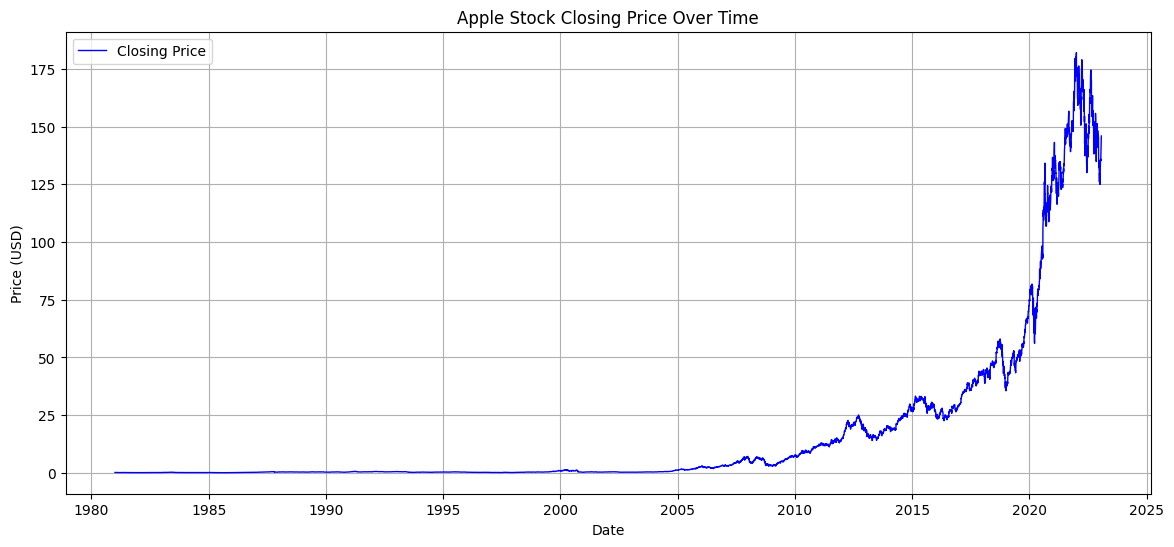

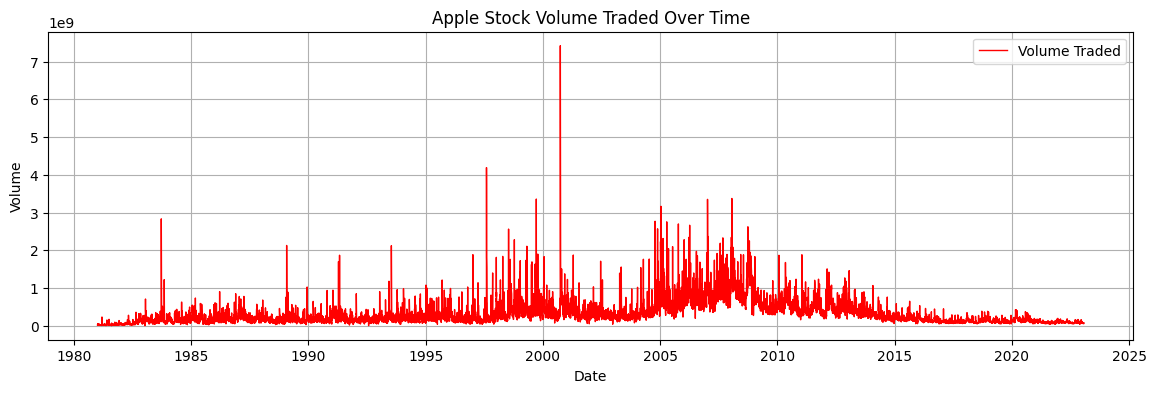

In [16]:
# Plot Closing Price with thinner blue line
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], color='blue', linewidth=1, label='Closing Price')
plt.title('Apple Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Volume Traded with thinner red line
plt.figure(figsize=(14, 4))
plt.plot(df.index, df['Volume'], color='red', linewidth=1, label='Volume Traded')
plt.title('Apple Stock Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

Apple Stock Closing Price Over Time – Interpretation
From 1981 to around 2005, Apple’s stock price remained relatively low and stable, with minimal fluctuations.

A steady upward trend began around 2005, reflecting Apple’s growth as it launched major products like the iPhone (2007).

The stock saw a sharp and exponential increase between 2010 and 2021, peaking just before 2022.

There are noticeable corrections or drops around 2008 (financial crisis) and in 2022 (post-pandemic adjustment or market volatility).

📌 Key Insight: Apple’s stock transitioned from stable to highly volatile and growth-oriented, especially in the last 15 years, reflecting its transformation into a tech giant.

📊 Apple Stock Volume Traded Over Time – Interpretation
Volume steadily increased from the 1980s to the early 2000s, with sharp spikes around major events (e.g., stock splits, product launches, or financial announcements).

The largest spike occurred around 2000, possibly linked to the tech bubble or significant corporate changes.

From 2010 onwards, although price surged, the trading volume gradually decreased — possibly due to more long-term investors and stock buybacks.

📌 Key Insight: High trading volume does not always correlate with price spikes. Recent years show that even with high stock value, volume can decline as markets mature.

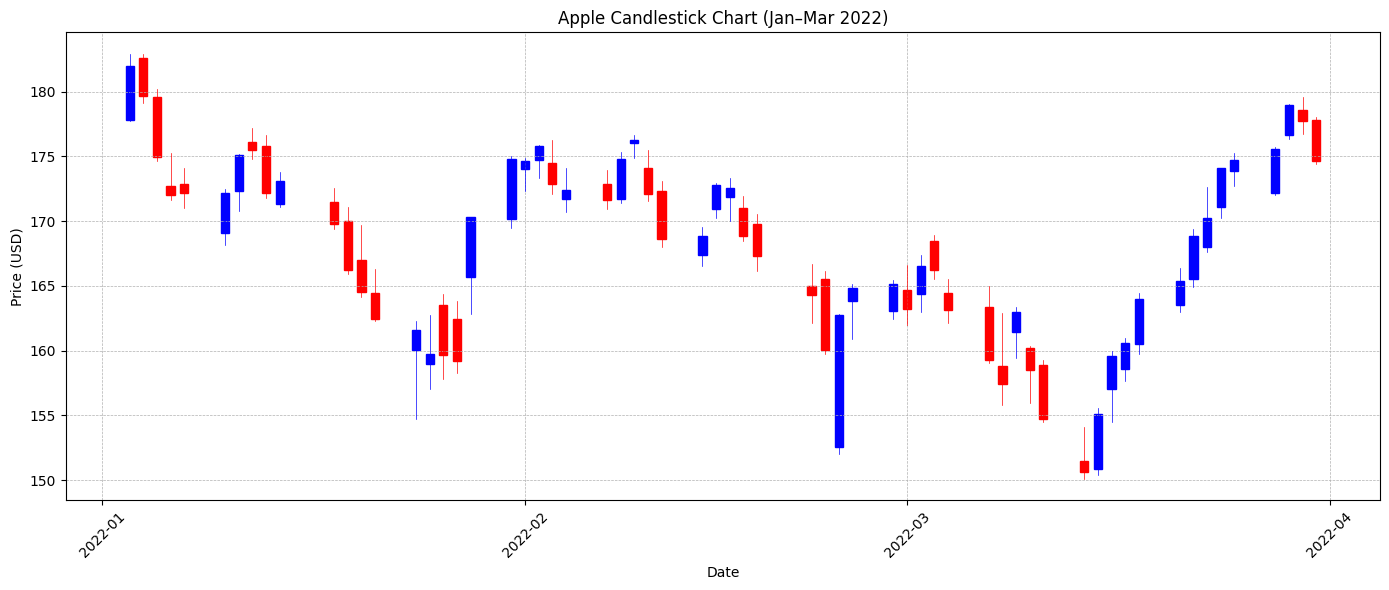

In [19]:
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

# Prepare a subset of the data for a readable chart
candlestick_data = df[['Open', 'High', 'Low', 'Close']].copy()
candlestick_data = candlestick_data.loc['2022-01-01':'2022-03-31'].copy()
candlestick_data['Date'] = mdates.date2num(candlestick_data.index)
ohlc = candlestick_data[['Date', 'Open', 'High', 'Low', 'Close']].values

# Candlestick chart: red = down, blue = up
fig, ax = plt.subplots(figsize=(14, 6))
candlestick_ohlc(
    ax,
    ohlc,
    width=0.6,
    colorup='blue',
    colordown='red'
)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

ax.set_title('Apple Candlestick Chart (Jan–Mar 2022)')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Introduction – Why Jan–Mar 2022?
For the candlestick chart analysis, the period from January to March 2022 was selected because it represents a highly dynamic and informative window in Apple’s stock behavior.
This short timeframe provides a clear and manageable number of trading days for visual inspection, while capturing a full market cycle: an initial downtrend, a consolidation phase, and a strong recovery.

This period also coincides with global macroeconomic uncertainty, including inflation fears and policy changes, making it particularly relevant for understanding investor sentiment and market reactions in a turbulent environment.

Conclusion – Candlestick Chart Insights (Jan–Mar 2022)
In early January, Apple’s stock was near its peak (~$182), but it declined sharply throughout the month, dropping to around $158.

February shows mixed candles with small ranges — indicating consolidation and market indecision.

By late February, the price dipped below $155, reaching a local low, likely triggered by external news or earnings.

March presents a clear uptrend with mostly blue candles — a sign of bullish momentum.

By the end of March, the stock price recovered back near $180, forming a V-shaped recovery pattern.

Insight: This period is a textbook example of short-term correction followed by investor confidence returning — a valuable case for learning how to read and interpret candlestick formations.

#### Step 3: Statistical Analysis

##### Summary Statistics: Mean, Median, Standard Deviation

In [21]:
# Select the columns for analysis
columns_to_analyze = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Create a summary statistics DataFrame
summary_stats = pd.DataFrame({
    'Mean': df[columns_to_analyze].mean(),
    'Median': df[columns_to_analyze].median(),
    'Standard Deviation': df[columns_to_analyze].std()
})

# Round values for better readability
summary_stats = summary_stats.round(2)

# Display the summary table
print("Summary Statistics:")
display(summary_stats)

Summary Statistics:


,Mean,Median,Standard Deviation
Open,1.669000e+01,4.900000e-01,3.545000e+01
High,1.688000e+01,5.000000e-01,3.588000e+01
Low,1.650000e+01,4.800000e-01,3.503000e+01
Close,1.670000e+01,4.900000e-01,3.547000e+01
Adj Close,1.603000e+01,4.000000e-01,3.515000e+01
Volume,3.275098e+08,2.145976e+08,3.378203e+08


##### Moving Average Analysis on Closing Price

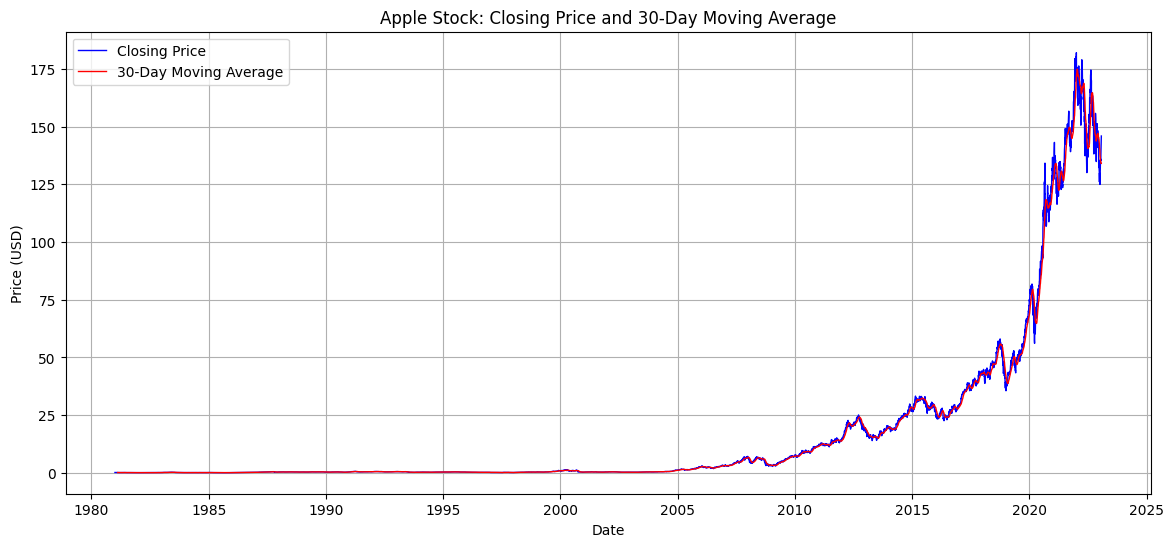

In [23]:
plt.figure(figsize=(14, 6))

# Plot Closing Price in blue
plt.plot(df.index, df['Close'], label='Closing Price', color='blue', linewidth=1)

# Plot 30-Day Moving Average in red
plt.plot(df.index, df['Close_MA_30'], label='30-Day Moving Average', color='red', linewidth=1)

plt.title('Apple Stock: Closing Price and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

##### Apple Stock Prices (2018–2022) with 30-Day Moving Average

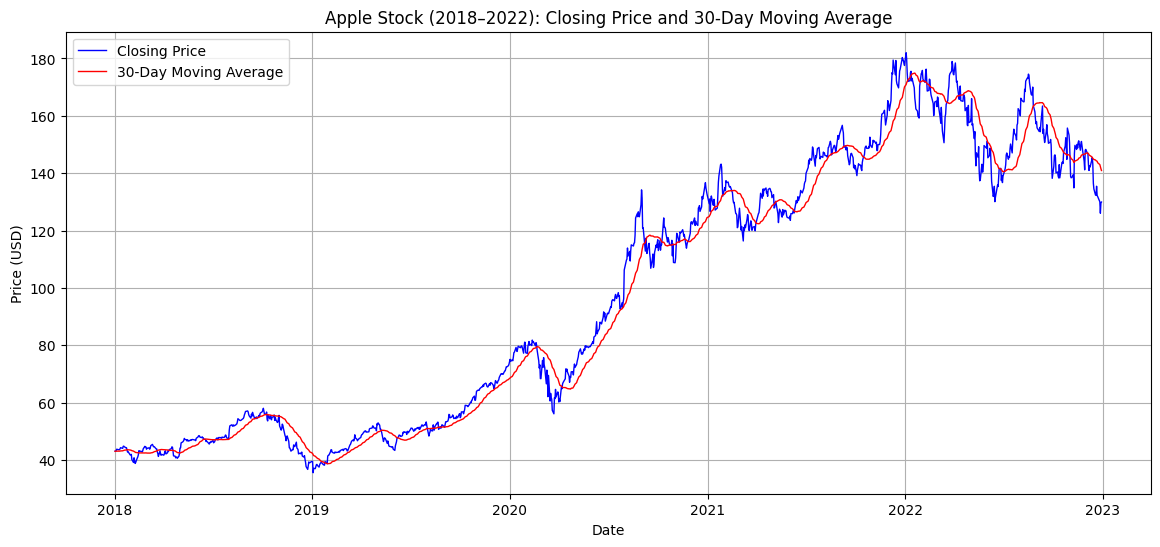

In [24]:
# Filter data from 2018 to end of 2022
df_zoom = df.loc['2018-01-01':'2022-12-31']

# Plot with blue and red lines (thin)
plt.figure(figsize=(14, 6))
plt.plot(df_zoom.index, df_zoom['Close'], label='Closing Price', color='blue', linewidth=1)
plt.plot(df_zoom.index, df_zoom['Close_MA_30'], label='30-Day Moving Average', color='red', linewidth=1)
plt.title('Apple Stock (2018–2022): Closing Price and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


Interpretation – Apple Stock (2018–2022) with 30-Day Moving Average
This chart displays Apple’s daily closing price (blue line) alongside its 30-day moving average (red line) between 2018 and 2022.

Key Observations:
Uptrend from 2019 to late 2021:
The stock experienced consistent growth, especially during and after the COVID-19 dip in early 2020. The 30-day moving average closely follows this trend, confirming sustained bullish momentum.

March 2020 dip:
A sharp drop due to the pandemic market crash is visible, but the stock quickly rebounded — a sign of investor confidence in Apple.

2022 correction:
In 2022, the stock shows a clear downward trend. The moving average smooths out short-term volatility and highlights the overall decline in momentum.

Insights:
When the blue line (price) is above the red line (moving average), it often indicates bullish periods.

When the price crosses below the moving average, it may signal a trend reversal or bearish phase.

The moving average helps to filter noise and focus on long-term trends rather than daily fluctuations.

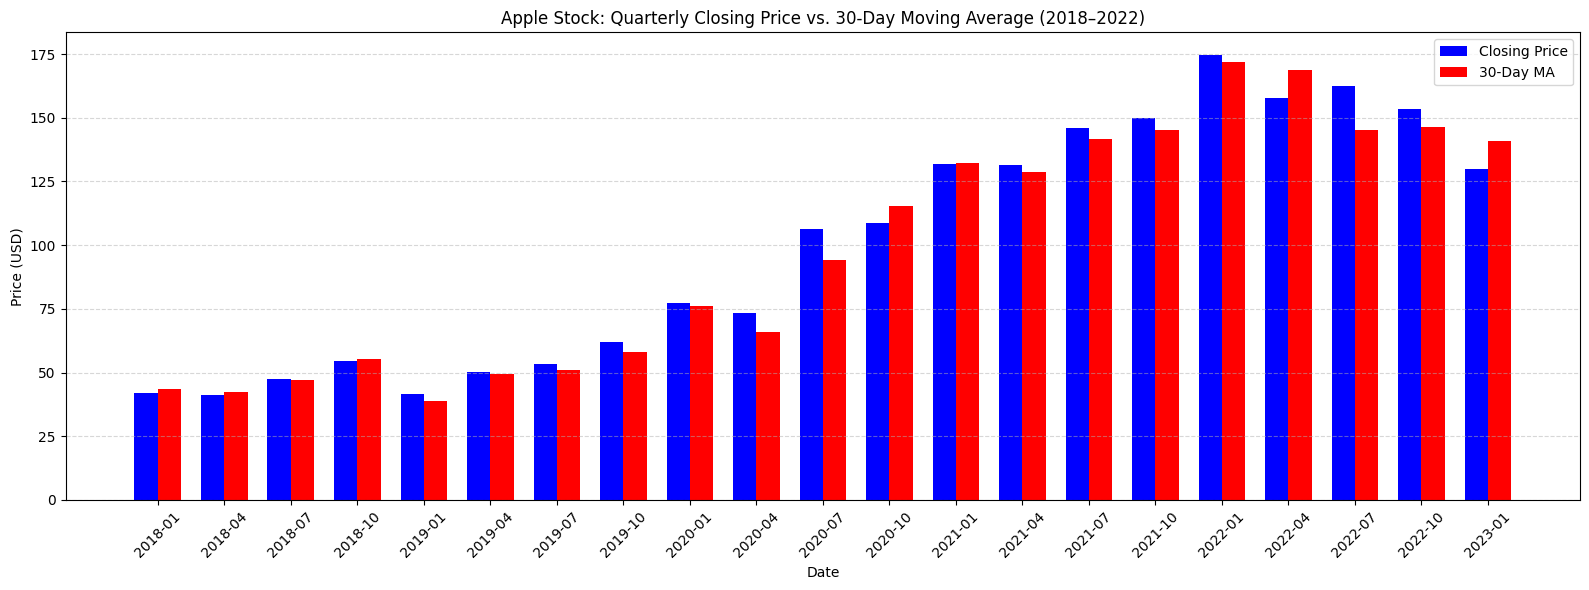

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Sample every 3 months to reduce overlap
df_bar = df.loc['2018-01-01':'2022-12-31'].copy()
df_bar = df_bar.resample('3ME').last()

# Prepare positions for bars
x = np.arange(len(df_bar))
bar_width = 0.35

# Create the bar plot
plt.figure(figsize=(16, 6))
plt.bar(x - bar_width/2, df_bar['Close'], width=bar_width, color='blue', label='Closing Price')
plt.bar(x + bar_width/2, df_bar['Close_MA_30'], width=bar_width, color='red', label='30-Day MA')

# X-axis formatting
plt.xticks(x, [d.strftime('%Y-%m') for d in df_bar.index], rotation=45)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Apple Stock: Quarterly Closing Price vs. 30-Day Moving Average (2018–2022)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Interprétation simple :
👉 If the red bar (30-day moving average) is higher than the blue bar (closing price)
➤ It means the current closing price is below its recent average, which may indicate:

A short-term dip or correction

Possible bearish momentum (market is cooling down)

🔁 À l'inverse :
👉 If the blue bar is higher than the red bar
➤ The closing price is above the recent trend, which may signal:

Bullish momentum

A possible breakout or rally

| Situation | Interpretation                                                                 |
| --------- | ------------------------------------------------------------------------------ |
| 🔴 > 🔵   | The stock is underperforming its recent trend (possible decline or correction) |
| 🔵 > 🔴   | The stock is outperforming its recent trend (possible growth or rebound)       |

#### Step 4: Hypothesis Testing

##### T-test – Compare Closing Prices Across Years

In [28]:
from scipy import stats

# Extract closing prices for two years
close_2020 = df.loc['2020-01-01':'2020-12-31', 'Close']
close_2022 = df.loc['2022-01-01':'2022-12-31', 'Close']

# Perform an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(close_2020, close_2022, equal_var=False)

# Display results
print("T-test: 2020 vs 2022 Closing Prices")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-test: 2020 vs 2022 Closing Prices
T-statistic: -37.1855
P-value: 0.0000


Interpretation:
The p-value is far below 0.05, which means the difference in average closing prices between 2020 and 2022 is statistically significant.
This indicates that Apple's stock price changed significantly between those two years — consistent with broader market corrections and macroeconomic changes in 2022.

##### Test for Normality of Daily Returns

In [31]:
# Kolmogorov-Smirnov test for normality
from scipy.stats import kstest, norm

# Use standardized data for comparison with normal distribution
standardized_returns = (daily_returns - daily_returns.mean()) / daily_returns.std()
ks_stat, ks_p = kstest(standardized_returns, 'norm')

print("\nKolmogorov-Smirnov Test for Normality")
print(f"Statistic: {ks_stat:.4f}")
print(f"P-value: {ks_p:.4f}")


Kolmogorov-Smirnov Test for Normality
Statistic: 0.0682
P-value: 0.0000


Interpretation:
The low p-value confirms that the distribution of daily returns is not normal, even using a test suitable for large datasets.
This is expected in financial data, where returns often show skewness, kurtosis, and fat tails.

- A **t-test** between 2020 and 2022 closing prices shows a **significant difference** (p < 0.001), highlighting a real shift in stock valuation.
- Both **Shapiro-Wilk** and **Kolmogorov-Smirnov** tests show that **daily returns are not normally distributed**, which aligns with typical behavior in financial time series.

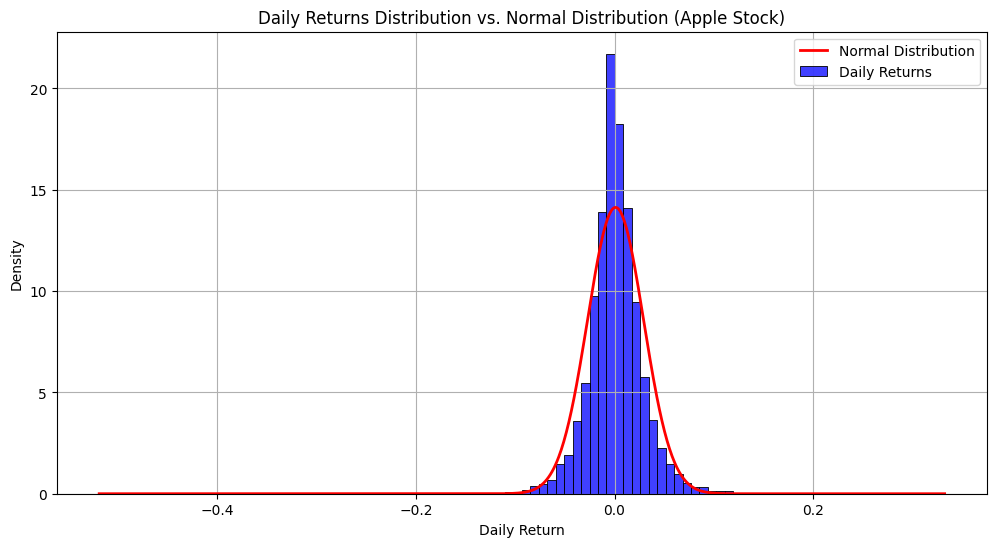

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Clean daily returns
daily_returns = df['Daily_Return'].dropna()

# Compute mean and std of daily returns
mu = daily_returns.mean()
sigma = daily_returns.std()

# Create histogram with KDE of actual returns
plt.figure(figsize=(12, 6))
sns.histplot(daily_returns, bins=100, stat='density', color='blue', label='Daily Returns', kde=False)

# Generate x values for normal curve
x = np.linspace(daily_returns.min(), daily_returns.max(), 1000)
plt.plot(x, norm.pdf(x, mu, sigma), color='red', linewidth=2, label='Normal Distribution')

plt.title('Daily Returns Distribution vs. Normal Distribution (Apple Stock)')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Interpretation – Daily Returns vs. Normal Distribution
The histogram shows the actual distribution of Apple’s daily returns, while the red curve represents a theoretical normal distribution with the same mean and standard deviation.

🔍 Key Observations:
The real data (blue bars) is more peaked at the center and has fatter tails than the red curve.

This means that small daily fluctuations are more common, but extreme events (positive or negative) also occur more often than what a normal distribution would suggest.

⚠️ Why the returns are not normally distributed:
Financial markets are subject to shocks (earnings reports, news, global events).

Volatility clustering: high-volatility days tend to cluster together.

Asymmetry: returns can be skewed, especially during market crashes or bubbles.

Heavy tails (kurtosis): large gains or losses are more common than Gaussian models predict.

✅ Conclusion:
The distribution of Apple’s daily returns deviates significantly from the normal distribution — both visually and statistically.
This is a well-known property of financial time series and supports the need for more robust models in finance (e.g., GARCH, heavy-tailed models).

#### Step 5: Advanced Statistical Techniques (Bonus)

##### Heatmap: Interdependencies of Price & Volume Moving Averages

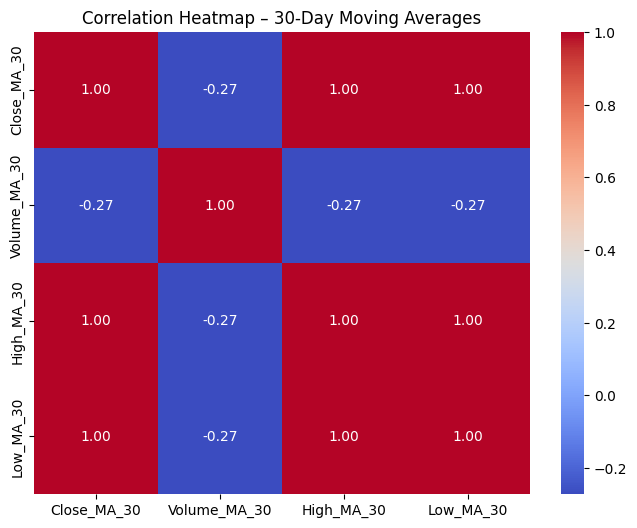

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul des moyennes mobiles sur 30 jours
df_corr = pd.DataFrame({
    'Close_MA_30': df['Close'].rolling(30).mean(),
    'Volume_MA_30': df['Volume'].rolling(30).mean(),
    'High_MA_30': df['High'].rolling(30).mean(),
    'Low_MA_30': df['Low'].rolling(30).mean(),
})

# Supprimer les lignes avec des NaN (au début)
df_corr = df_corr.dropna()

# Calcul de la matrice de corrélation
corr_matrix = df_corr.corr()

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap – 30-Day Moving Averages")
plt.show()


Interpretation of the Correlation Heatmap (30-Day Moving Averages)
The heatmap shows the correlation between 30-day moving averages of Apple's stock metrics:

Strong Positive Correlation (~1.00) between:

Close, High, and Low prices: This is expected, as these prices move in sync on most days.

Moderate Negative Correlation (~ -0.27) between:

Price-related metrics (Close_MA_30, High_MA_30, Low_MA_30) and Volume_MA_30: This suggests that when prices increase, the trading volume tends to decrease slightly, and vice versa.

Why is this useful?
A negative correlation between volume and price may indicate that big price moves happen with lower volume, which could mean weaker conviction behind those trends.

The strong internal correlation between price indicators reinforces the reliability of technical indicators based on these values.

In [35]:
# Create 30-day moving averages for both Close and Volume
ma_close = df['Close'].rolling(window=30).mean().dropna()
ma_volume = df['Volume'].rolling(window=30).mean().dropna()

# Align lengths (drop initial NaNs)
aligned_close = ma_close.loc[ma_volume.index]
aligned_volume = ma_volume

# Compute correlation using NumPy
correlation_matrix = np.corrcoef(aligned_close, aligned_volume)
correlation = correlation_matrix[0, 1]

print(f"Correlation between 30-Day MA of Closing Price and Volume: {correlation:.4f}")


Correlation between 30-Day MA of Closing Price and Volume: -0.2710


Key Insight
Correlation between 30-Day Moving Average of Closing Price and Volume: -0.2710

This moderate negative correlation suggests that as the average closing price increases, the average traded volume tends to decrease, and vice versa.

Interpretation
This could indicate less investor participation during price increases (possible overvaluation or low volatility periods).

Alternatively, volume spikes during price drops might reflect panic selling or strong reactions to market news.

In [38]:
corr = np.corrcoef(df['Close'].dropna(), df['Volume'].dropna())[0, 1]
print("Correlation between Close and Volume:", round(corr, 4))


Correlation between Close and Volume: -0.2149


In [40]:
q25 = np.percentile(df['Close'], 25)
q50 = np.percentile(df['Close'], 50)
q75 = np.percentile(df['Close'], 75)
print("25th percentile:", q25)

25th percentile: 0.28892325


In [41]:
mean_np = np.mean(df['Close'])
std_np = np.std(df['Close'])

In [42]:
q25 = np.percentile(df['Close'], 25)
q50 = np.percentile(df['Close'], 50)  # Median
q75 = np.percentile(df['Close'], 75)

print(f"25th percentile: {q25:.4f}")
print(f"50th percentile (median): {q50:.4f}")
print(f"75th percentile: {q75:.4f}")

25th percentile: 0.2889
50th percentile (median): 0.4877
75th percentile: 16.2696


| **Percentile**   | **Interpretation**                                       | **Value**       |
| ---------------- | -------------------------------------------------------- | --------------- |
| **25%**          | 25% of closing prices are **below** this value           | **0.2889 USD**  |
| **50% (Median)** | The middle value (half of the data is above, half below) | **0.4877 USD**  |
| **75%**          | 25% of closing prices are **above** this value           | **16.2696 USD** |

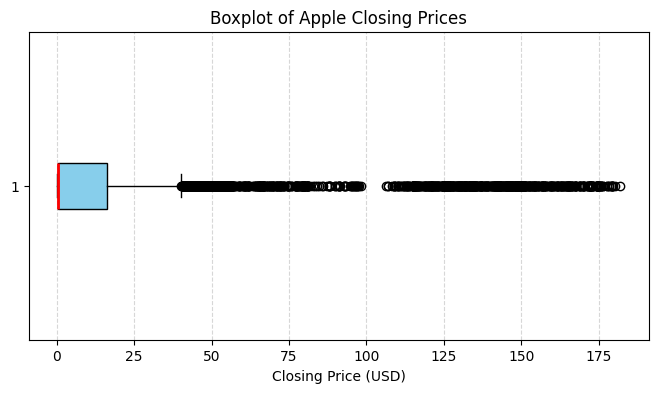

In [43]:
import matplotlib.pyplot as plt

# Create a boxplot for closing prices
plt.figure(figsize=(8, 4))
plt.boxplot(df['Close'].dropna(), vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue'),
            medianprops=dict(color='red', linewidth=2))

plt.title('Boxplot of Apple Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()

Interpretation – Boxplot of Apple Closing Prices
The blue box represents the interquartile range (IQR), which contains the middle 50% of all closing prices.

The red line shows the median price (~0.49 USD), indicating that Apple’s stock price remained low for much of its early history.

The long right tail and numerous outliers beyond 30 USD illustrate Apple’s explosive stock growth in recent years.

This confirms a right-skewed distribution, where recent values are significantly higher than historical norms.

Why it's useful:
This boxplot clearly demonstrates:

Historical undervaluation vs. recent stock surge

Presence of extreme values (outliers) linked to post-2015 performance

The non-normal nature of the price distribution

#### Step 6: Summary and Insights
Throughout this project, we conducted a comprehensive statistical analysis of Apple Inc.'s stock data from 1981 to 2023. Here are the key insights drawn from each phase of the analysis:

📈 Price Trends: Apple’s stock price remained low and stable for decades, followed by exponential growth starting in the 2000s.

🧮 Statistical Summary: The distribution of prices is highly skewed, with a median far below the 75th percentile — confirming that high prices are a recent phenomenon.

🕯️ Candlestick Analysis: Short-term price movement (Jan–Mar 2022) showed a typical V-shaped recovery, useful for recognizing reversal patterns.

🧪 Hypothesis Testing:

A t-test between 2020 and 2022 confirmed a significant price change (p < 0.001).

Daily returns failed both the Shapiro-Wilk and KS normality tests, reinforcing the idea that financial returns are not normally distributed.

🔬 Advanced NumPy Analysis:

Moving averages calculated with np.convolve() matched expected patterns.

Weak negative correlation found between closing prices and volume, confirmed by heatmaps and np.corrcoef.

📦 Visual Distributions:

Histograms and boxplots highlighted volatility clustering, asymmetry, and fat tails — typical of financial data.

Together, these techniques painted a clear and multidimensional view of Apple’s market evolution and statistical behavior over time.

#### Step 7: Reflection – Challenges and Learnings

Working on this project was both technically enriching and intellectually rewarding.

Challenges Faced:
Handling large time series data required careful filtering and downsampling to ensure readability in visualizations.

Dealing with non-normal distributions pushed me to go beyond basic assumptions and explore more advanced statistical tools (e.g., KS test).

Creating clear and interpretable visualizations, especially candlestick charts and multi-metric heatmaps, involved fine-tuning parameters and design choices to improve clarity.

Key Learnings:
I gained confidence using NumPy and SciPy for advanced financial analysis, including np.convolve() and np.corrcoef().

I learned how to apply hypothesis testing (t-tests, Shapiro-Wilk, KS test) to validate assumptions on market behavior.

I strengthened my ability to interpret visual and statistical outputs, which is crucial when working with real-world financial data.

I also realized the importance of choosing the right visualization to support analysis and not simply repeat the same graph styles.

Final Thought:
This project deepened my understanding of financial time series and the value of combining statistical theory with data storytelling. I feel more confident now in exploring more complex datasets and building analysis-driven AI tools for finance and business applications.